In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle


In [27]:
figure_num = 20**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
lw = np.array([0, -75])
up = np.array([20, 75])
fixed_params = {"height": 100}
seed = 123
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up, seed=seed)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUOriginalModel(k=5, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [28]:
mcu_model.train(max_iters=100, do_cliques=True, keep_mutual_only=False)


                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) May 07 11:52:41 AM: Your problem has 160000 variables, 2241 constraints, and 0 parameters.
(CVXPY) May 07 11:52:41 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 07 11:52:41 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 07 11:52:41 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 07 11:52:41 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 07 11:52:41 AM: Compiling problem (target solver=SCS)

In [25]:
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")
prob = mcu_model.prob
print(f"Status: {prob.status}")
constraint_residuals = [(constraint, constraint.residual) for constraint in prob.constraints]
constraint_residuals.sort(key=lambda x: abs(x[1]), reverse=True)
print()
for i, (constraint, residual) in enumerate(constraint_residuals[:5], 1):
    print(f"{i}. Constraint: {constraint}")
    print(f"   Residual: {residual}")

rre_median_embedding_vs_params: 1.0009710038666988
Average number of neighbors: 5
Status: optimal_inaccurate

1. Constraint: var367409[9, 0:400][9] + var367409[60, 0:400][60] + -2.0 @ var367409[9, 0:400][60] == 0.004295777743031925
   Residual: 0.002585589205595474
2. Constraint: var367409[71, 0:400][71] + var367409[275, 0:400][275] + -2.0 @ var367409[71, 0:400][275] == 0.007061373662085444
   Residual: 0.002430043061034428
3. Constraint: var367409[221, 0:400][221] + var367409[251, 0:400][251] + -2.0 @ var367409[221, 0:400][251] == 0.004301867683300888
   Residual: 0.0023708819133079076
4. Constraint: var367409[25, 0:400][25] + var367409[69, 0:400][69] + -2.0 @ var367409[25, 0:400][69] == 0.0027210477437735383
   Residual: 0.00214285666542228
5. Constraint: var367409[49, 0:400][49] + var367409[370, 0:400][370] + -2.0 @ var367409[49, 0:400][370] == 0.003935723451479844
   Residual: 0.002039669384898091


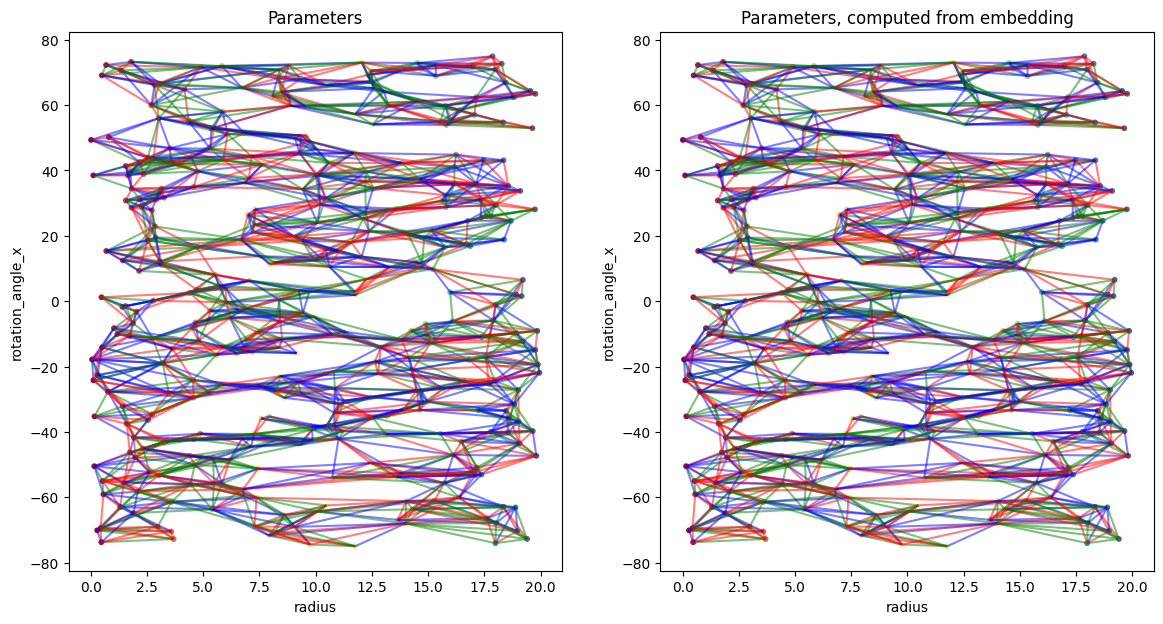

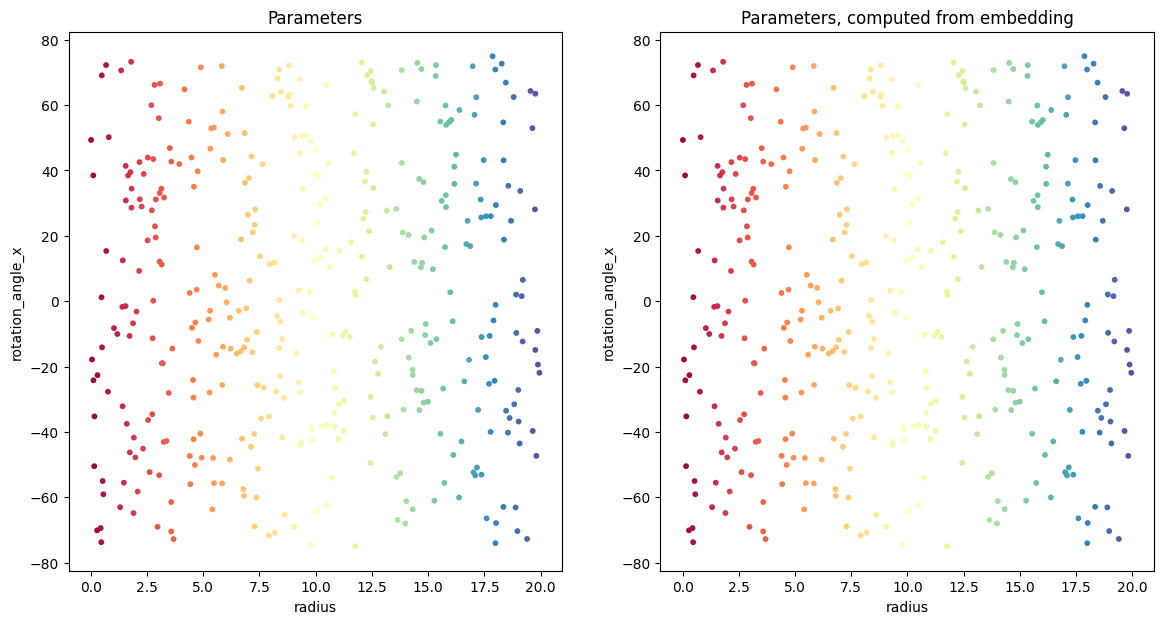

In [29]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [30]:
mcu_experiments = MCUexperiments(mcu_model)
k=5
seed = 153
pieces=8
test_size=50
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, k=k, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed)

Finding neighbors: 2 ms , optimization: 0 ms
-----------
x_opt  = [  2.59461191 -64.42771707], x_err = 0.004260168671420268
x_real = [  2.33794694 -64.79909116]
Finding neighbors: 2 ms , optimization: 0 ms
-----------
x_opt  = [  1.30191971 -59.2911955 ], x_err = 0.0015558334446627371
x_real = [  0.27745319 -58.93880482]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  1.43713462 -57.4269412 ], x_err = 0.002893792050834452
x_real = [  0.95539304 -57.18930132]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  1.05486046 -64.38178162], x_err = 0.003418181724295472
x_real = [  0.96387678 -64.10328594]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  1.90768615 -71.00245452], x_err = 0.013134119010102769
x_real = [  2.30103864 -74.84619902]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  2.10129646 -69.85164931], x_err = 0.011010719605702364
x_real = [  2.43168351 -70.62135017]
Finding neighbors: 2 ms , optimiz

In [31]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, baseline=True, seed = seed)

-----------
x_opt  = [  1.90565586 -64.83420825], x_err = 0.008369433185994922
x_real = [  2.33794694 -64.79909116]
-----------
x_opt  = [  0.56607632 -59.08533938], x_err = 0.005707472465509135
x_real = [  0.27745319 -58.93880482]
-----------
x_opt  = [  0.56607632 -59.08533938], x_err = 0.009245190091999662
x_real = [  0.95539304 -57.18930132]
-----------
x_opt  = [  1.31277633 -63.02789714], x_err = 0.004300305582028283
x_real = [  0.96387678 -64.10328594]
-----------
x_opt  = [  3.68675975 -72.76576249], x_err = 0.04288654964995521
x_real = [  2.30103864 -74.84619902]
-----------
x_opt  = [  2.97511624 -69.04100778], x_err = 0.018186374679781403
x_real = [  2.43168351 -70.62135017]
-----------
x_opt  = [  0.56607632 -59.08533938], x_err = 0.005706233413730187
x_real = [  0.19915144 -59.25586866]
-----------
x_opt  = [  0.56607632 -59.08533938], x_err = 0.00572491611198702
x_real = [  0.948107   -59.20383326]
-----------
x_opt  = [  0.47375973 -73.74253392], x_err = 0.03397985086254

In [56]:
data = {
    'model': mcu_model,
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base
}
with open('tmp_storage/orig_cyl.pkl', 'wb') as f:
    pickle.dump(data, f)


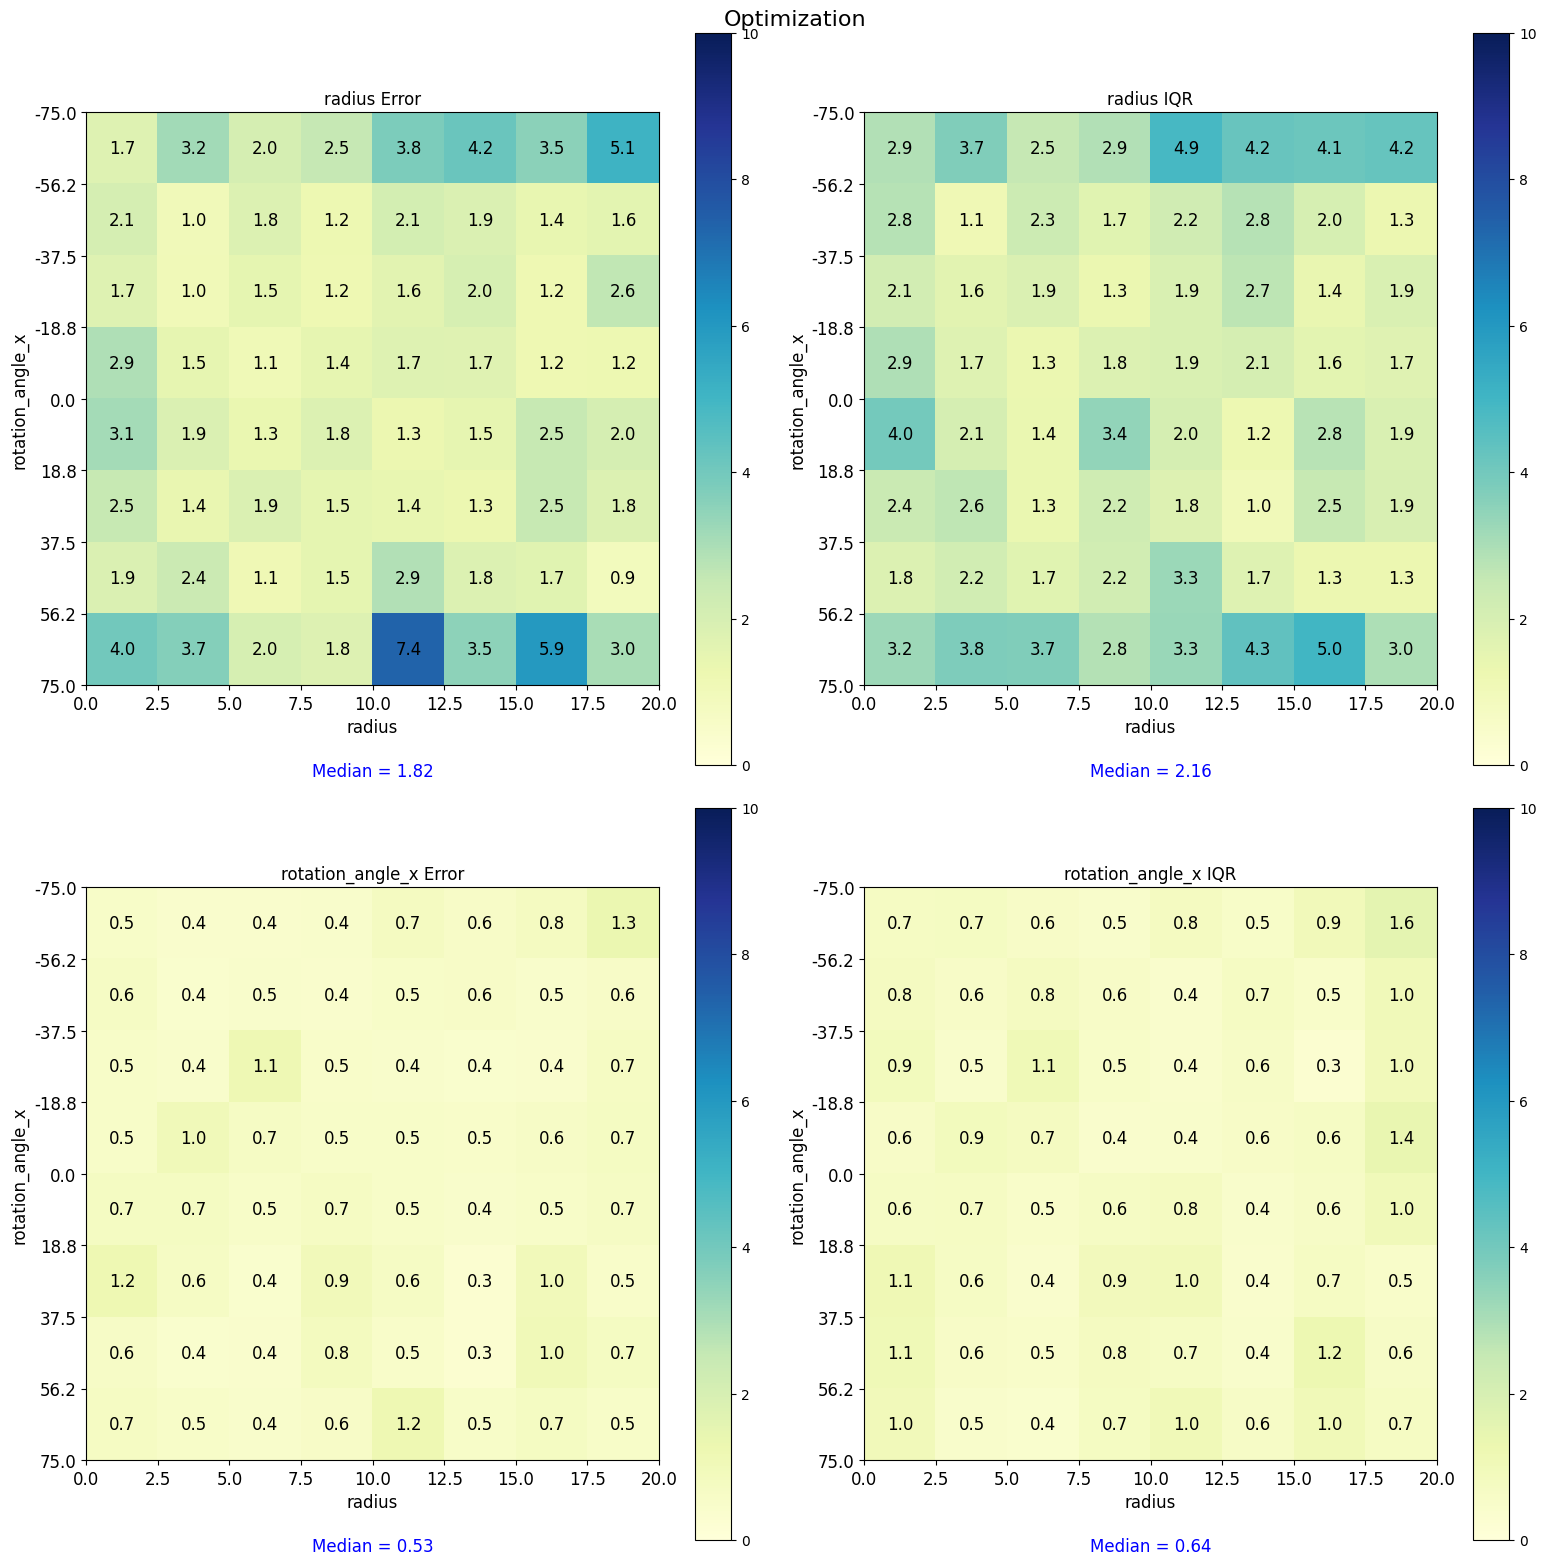

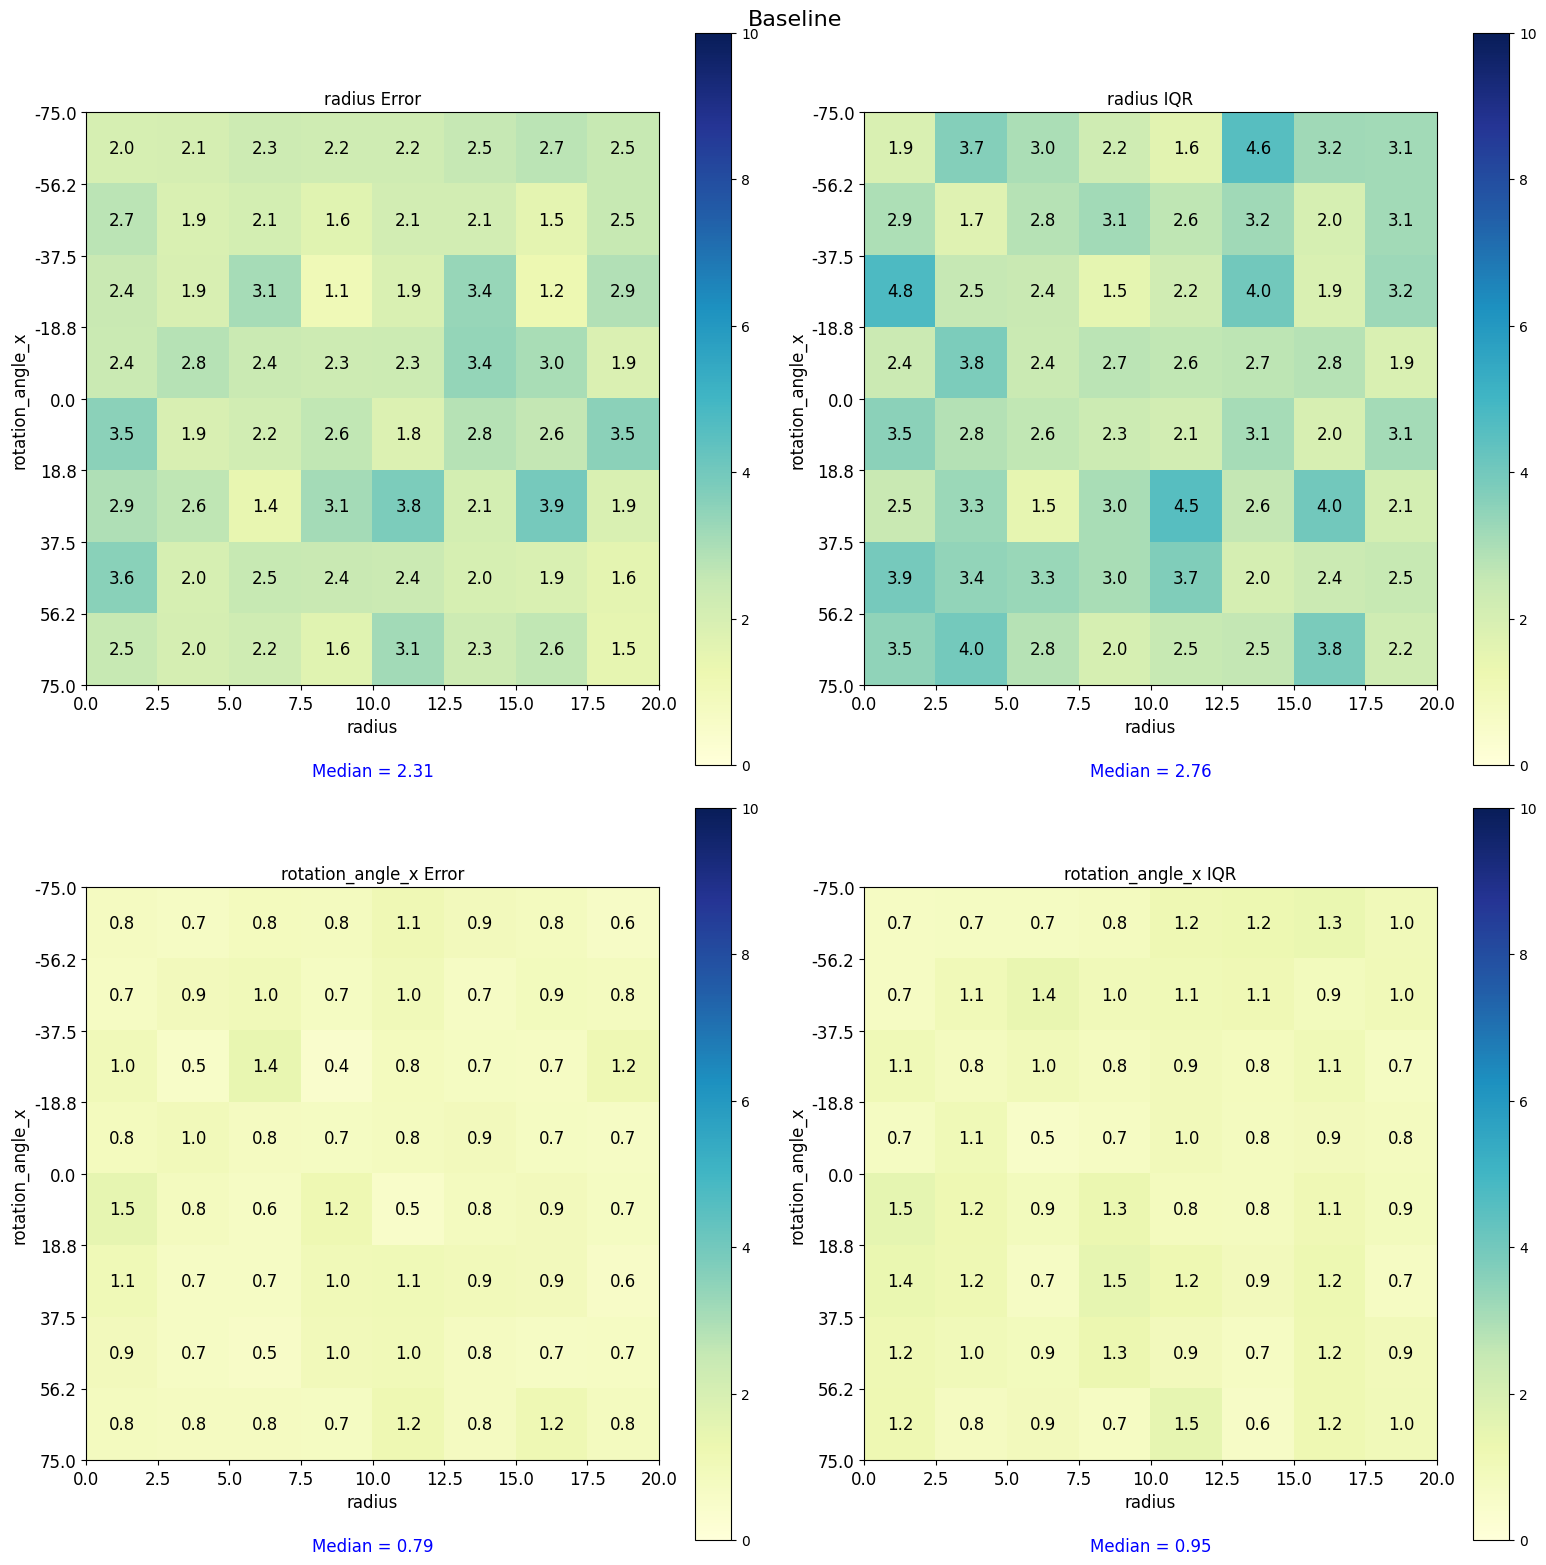

In [38]:
heatmap_lw=0
hetmap_up=10
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_cyl_2d.png", title="Optimization", lw=heatmap_lw, up=hetmap_up)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/orig_cyl_2d_base.png", title="Baseline", lw=heatmap_lw, up=hetmap_up)

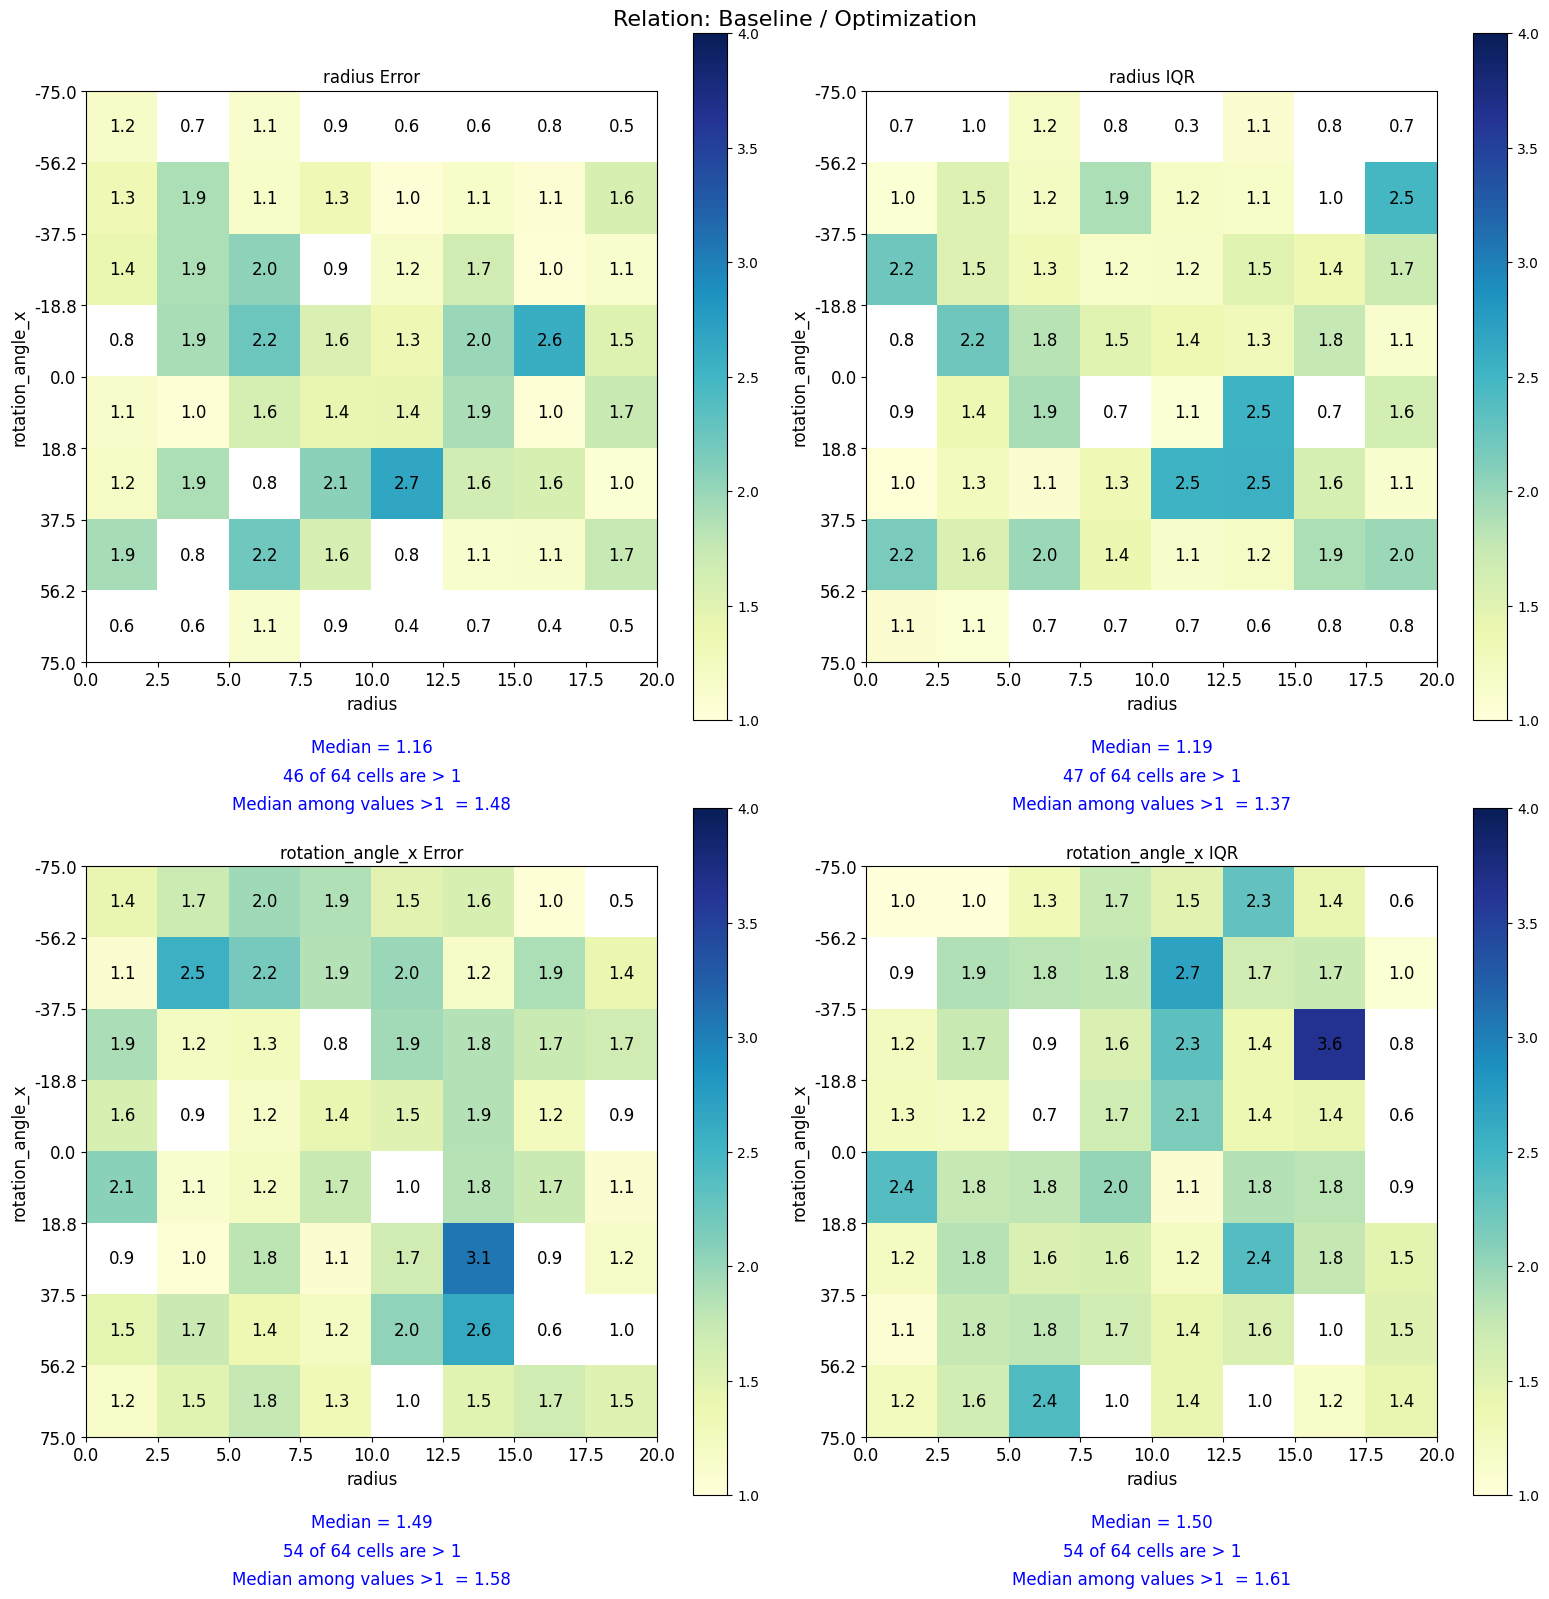

In [40]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/orig_cyl_2d_rel.png", title="Relation: Baseline / Optimization", lw=1, up=4, count_greater_than=1)

-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


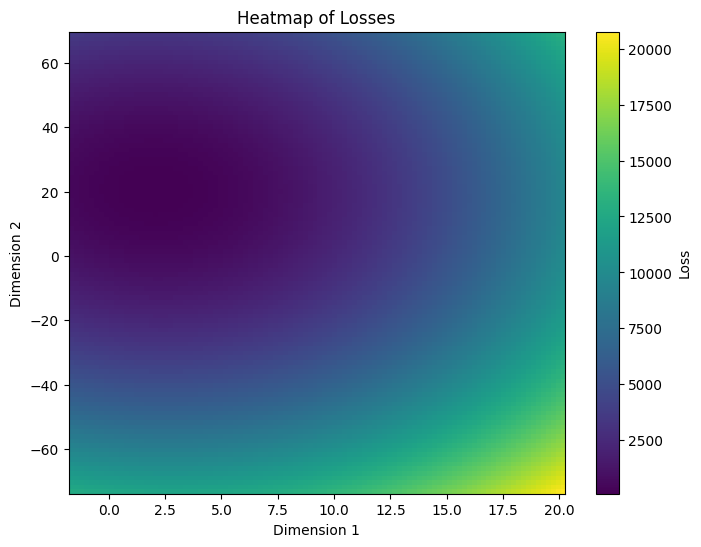

Finding neighbors: 1 ms , optimization: 173 ms
x_opt = [ 1.9318767  20.89038943], x_err = 101.22075338280348
x_real = [ 3 15]
-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


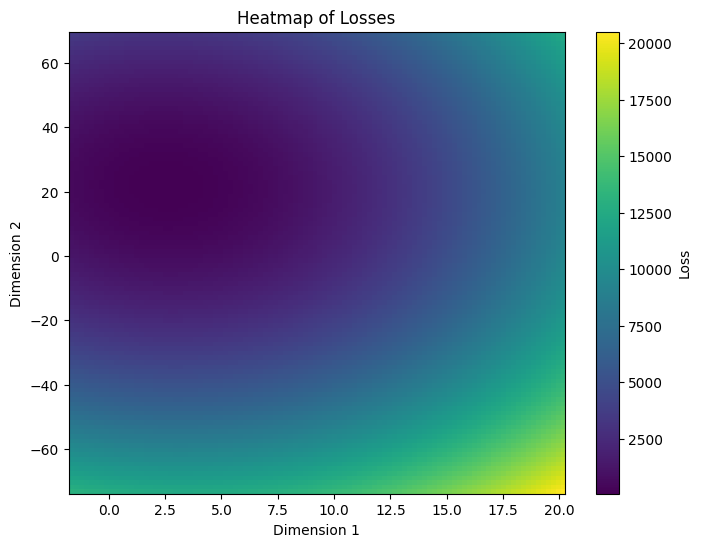

Finding neighbors: 0 ms , optimization: 174 ms
x_opt = [ 2.46635057 22.16683545], x_err = 54.49458604656261
x_real = [ 4 21]
-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


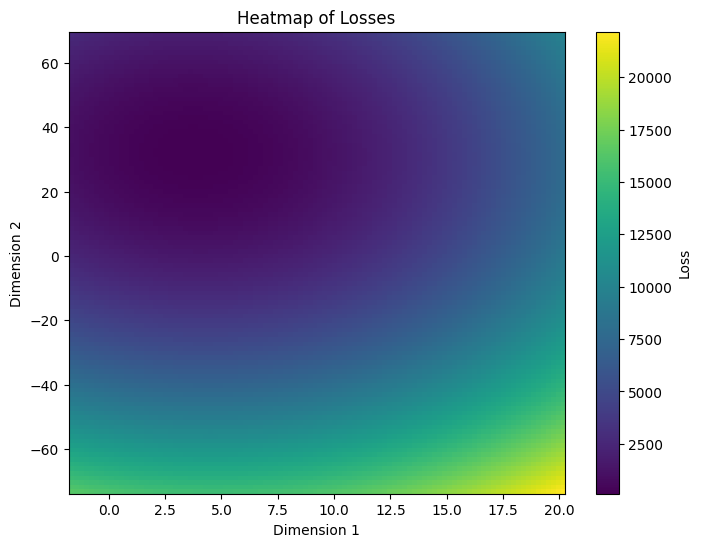

Finding neighbors: 1 ms , optimization: 179 ms
x_opt = [ 3.72739282 32.6648054 ], x_err = 116.05819831418958
x_real = [ 5 30]
-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


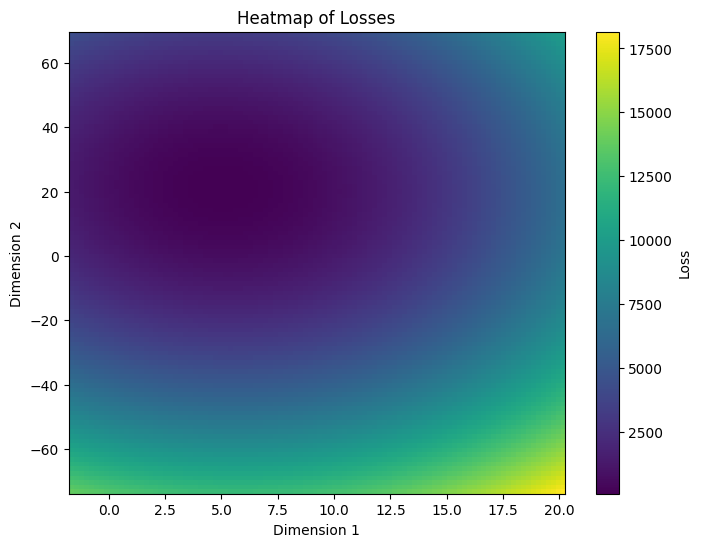

Finding neighbors: 1 ms , optimization: 172 ms
x_opt = [ 4.96883251 21.4987295 ], x_err = 84.00075397857157
x_real = [ 8 20]


In [35]:
test_control_vars = np.array([[3, 15], [4, 21], [5, 30], [8, 20]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, cyl_generator.generate_cylinder_points,
                                                           noise_level=noise_level,
                                                           min_num_points=figure_point_cnt)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True, k=5)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")

In [27]:
mcu_model.dists[1, 5]

0.011148275362298427